In [132]:
import os
import keras
import numpy as np
from PIL import Image
import tensorflow as tf
from keras_retinanet.models import load_model
from keras_retinanet.utils.image import read_image_bgr
from shared import get_session
import matplotlib.pyplot as plt

BASE_DIR = os.getcwd()
MODEL_PATH = os.path.join(BASE_DIR, 'snapshots', 'custom_resnet50_10_test.h5')
DATASET_DIR = os.path.join(BASE_DIR, 'datasets', 'GTSDB', 'FullIJCNN2013')
TEST_IMAGE = os.path.join(DATASET_DIR, '00001.ppm')

keras.backend.tensorflow_backend.set_session(get_session())
model = load_model(MODEL_PATH)

/home/madspoderpetersen/deep-traffic/venv/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


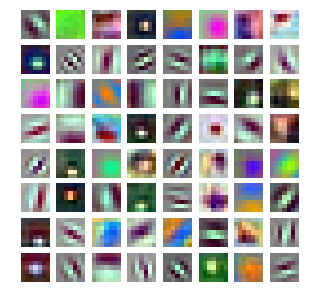

In [161]:
#print([layer.name for layer in model.layers])
#layers = list(map(lambda x: "Layer: "+x.name + "shape: "+ str(np.asarray(x.get_weights()).shape), model.layers))
#for layer in layers:
#    print(layer)

vis_conv = np.asarray(model.get_layer('conv1').get_weights())

fig, ax = plt.subplots(figsize=(5, 5),nrows=8, ncols=8)
for i, ax in enumerate(ax.reshape(-1)):
    imgArray = vis_conv[0,:,:,:,i]
    # unity-based normalization https://datascience.stackexchange.com/a/5888
    imgArray = (imgArray - np.min(imgArray)) / (np.max(imgArray) - np.min(imgArray))
    ax.imshow(imgArray, vmin=np.min(imgArray), vmax=np.max(imgArray), interpolation='nearest')
    ax.axis('off')
plt.show()